**IMPORTING THE NECESSARY LIBRARIES**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, r2_score, accuracy_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.compose import ColumnTransformer
import shap
import warnings
warnings.filterwarnings('ignore')

**LOADING AND INSPECTING THE DATASETS**

In [2]:
data = pd.read_csv(r"C:\Users\hp\Documents\Data Science Projects\phase5_capstone\Early-Detection-of-Alzheimer-s-Disease-and-Related-Dementias-Using-Social-Determinants-of-Health\Data\train_features.csv")
data_labels = pd.read_csv(r"C:\Users\hp\Documents\Data Science Projects\phase5_capstone\Early-Detection-of-Alzheimer-s-Disease-and-Related-Dementias-Using-Social-Determinants-of-Health\Data\train_labels.csv")

In [3]:
data.head()

uid    age_03     urban_03  married_03  n_mar_03    edu_gru_03  \
0  aace       NaN          NaN         NaN       NaN           NaN   
1  aanz       NaN          NaN         NaN       NaN           NaN   
2  aape       NaN          NaN         NaN       NaN           NaN   
3  aard  1. 50–59  1. 100,000+  3. Widowed       1.0  3. 7–9 years   
4  ablr       NaN          NaN         NaN       NaN           NaN   

  n_living_child_03  migration_03 glob_hlth_03  adl_dress_03  ...  \
0               NaN           NaN          NaN           NaN  ...   
1               NaN           NaN          NaN           NaN  ...   
2               NaN           NaN          NaN           NaN  ...   
3         1. 1 or 2           0.0      4. Fair           0.0  ...   
4               NaN           NaN          NaN           NaN  ...   

            rrelgimp_12            rrfcntx_m_12              rsocact_m_12  \
0  2.somewhat important                 9.Never                   9.Never   
1      1.very important                 9.Never        1.Almost every day   
2  2.somewhat important  6.2 or 3 times a month  2.4 or more times a week   
3      1.very important           4.Once a week                   9.Never   
4      1.very important   3.2 or 3 times a week     3.2 or 3 times a week   

   rrelgwk_12  a16a_12  a21_12  a22_12  a33b_12  a34_12  \
0        0.No      NaN     NaN     NaN      NaN     NaN   
1        0.No      NaN     NaN     NaN      NaN     NaN   
2        0.No      NaN     NaN     NaN      NaN     NaN   
3       1.Yes      NaN     NaN     NaN      NaN    No 2   
4        0.No      NaN     NaN     NaN      NaN     NaN   

                              j11_12  
0                         Concrete 2  
1                         Concrete 2  
2  Wood, mosaic, or other covering 1  
3                         Concrete 2  
4  Wood, mosaic, or other covering 1  

[5 rows x 184 columns]

In [4]:
data_labels.head()

uid  year  composite_score
0  aace  2021              175
1  aanz  2021              206
2  aape  2016              161
3  aape  2021              144
4  aard  2021              104

In [5]:
print(data_labels.shape)
print(data.shape)

(4343, 3)
(3276, 184)


**DATA CLEANING**

In [6]:
df = pd.merge(data, data_labels, on='uid', how='left')
df.head()

uid    age_03     urban_03  married_03  n_mar_03    edu_gru_03  \
0  aace       NaN          NaN         NaN       NaN           NaN   
1  aanz       NaN          NaN         NaN       NaN           NaN   
2  aape       NaN          NaN         NaN       NaN           NaN   
3  aape       NaN          NaN         NaN       NaN           NaN   
4  aard  1. 50–59  1. 100,000+  3. Widowed       1.0  3. 7–9 years   

  n_living_child_03  migration_03 glob_hlth_03  adl_dress_03  ...  \
0               NaN           NaN          NaN           NaN  ...   
1               NaN           NaN          NaN           NaN  ...   
2               NaN           NaN          NaN           NaN  ...   
3               NaN           NaN          NaN           NaN  ...   
4         1. 1 or 2           0.0      4. Fair           0.0  ...   

               rsocact_m_12  rrelgwk_12  a16a_12  a21_12  a22_12  a33b_12  \
0                   9.Never        0.No      NaN     NaN     NaN      NaN   
1        1.Almost every day        0.No      NaN     NaN     NaN      NaN   
2  2.4 or more times a week        0.No      NaN     NaN     NaN      NaN   
3  2.4 or more times a week        0.No      NaN     NaN     NaN      NaN   
4                   9.Never       1.Yes      NaN     NaN     NaN      NaN   

   a34_12                             j11_12  year  composite_score  
0     NaN                         Concrete 2  2021              175  
1     NaN                         Concrete 2  2021              206  
2     NaN  Wood, mosaic, or other covering 1  2016              161  
3     NaN  Wood, mosaic, or other covering 1  2021              144  
4    No 2                         Concrete 2  2021              104  

[5 rows x 186 columns]

In [7]:
df.isna().sum()

uid                   0
age_03             1456
urban_03           1454
married_03         1454
n_mar_03           1482
                   ... 
a33b_12            4288
a34_12             1601
j11_12               89
year                  0
composite_score       0
Length: 186, dtype: int64

*HEAT MAP TO VISUALIZE MISSING VALUES*

Missing data patterns to gain insights into potential biases or patterns in the data collection process.

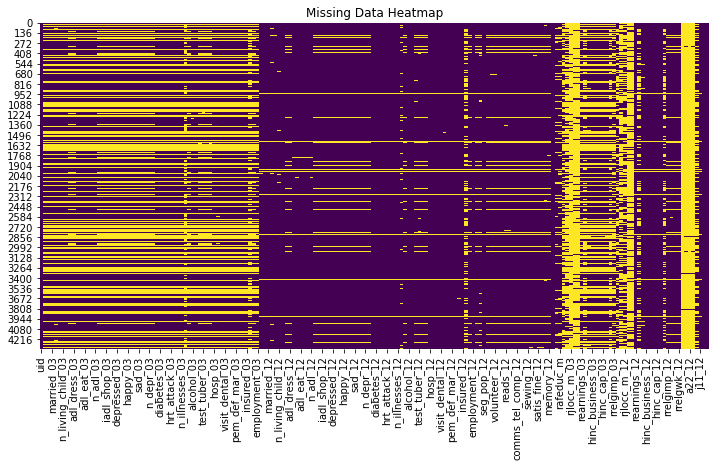

In [8]:
# Visualize missing data
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()


The heatmap displays the distribution of missing values (NaN) across different features.

Yellow represents presence of missing values and purple represents complete data.

*Observations*

1. The heatmap shows that missing values are unevenly distributed. Some features have a higher proportion of missing values than others
2. Certain features have consistently high levels of missing values, indicating issues with data collection or processing.
3. Some features have significant missing data, crucial for data cleaning.

#### **EXPLORATORY DATA ANALYSIS**

*Scatter plot for numerical variables*

This is to determine relationships between numerical columns and the target variables

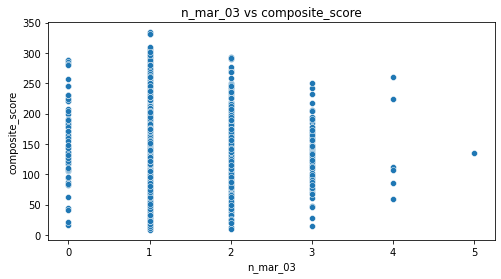

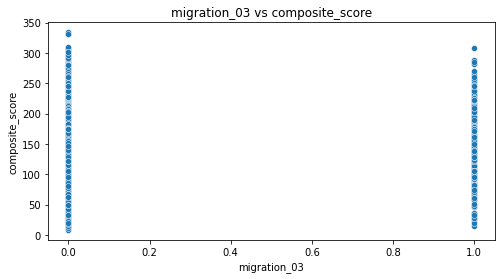

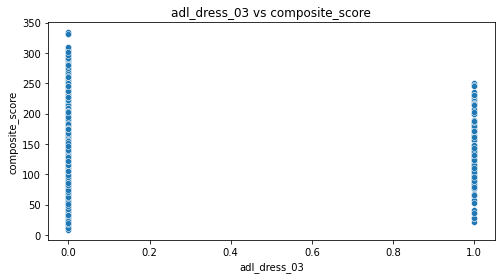

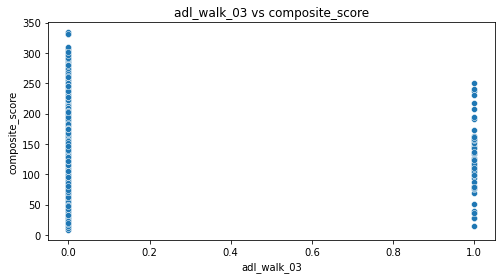

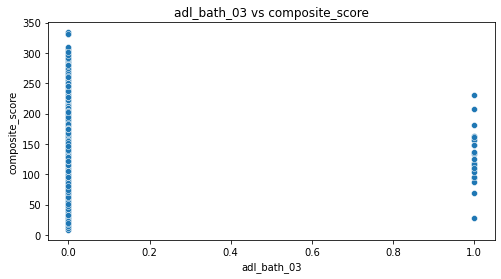

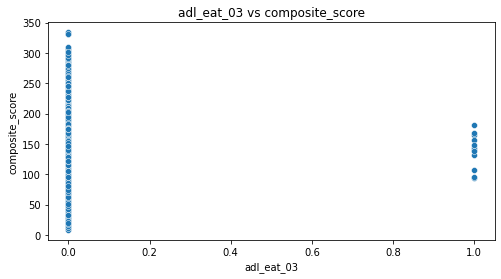

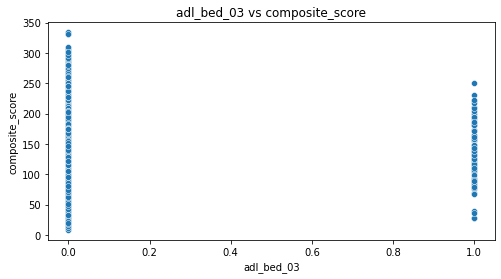

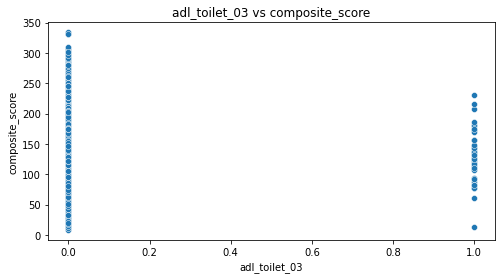

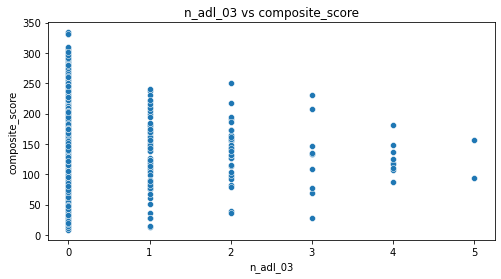

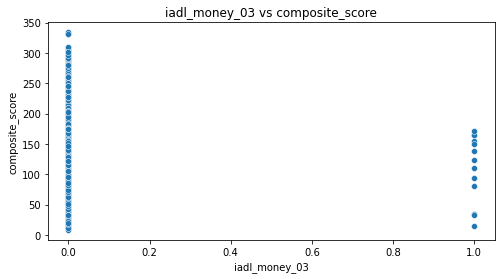

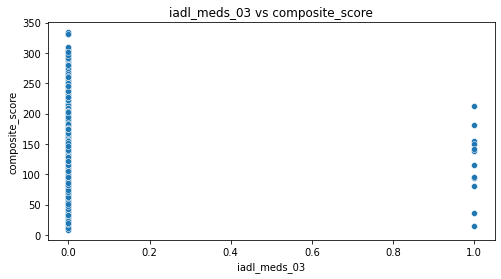

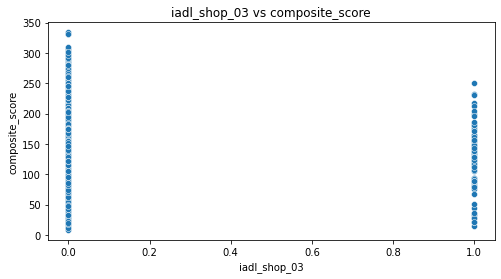

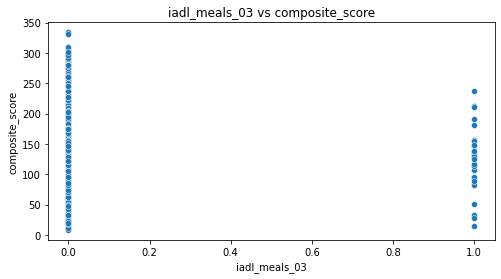

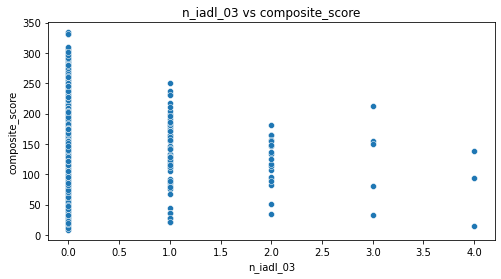

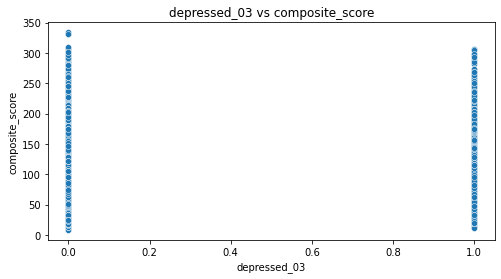

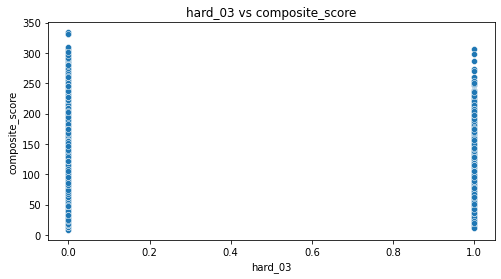

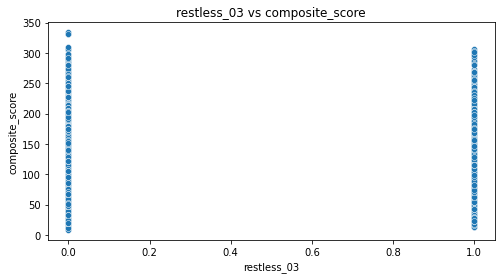

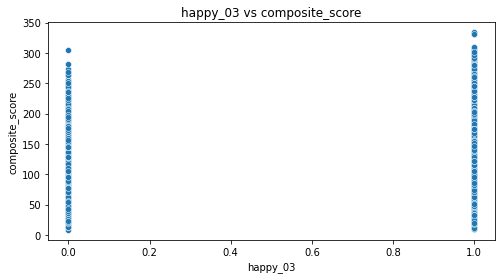

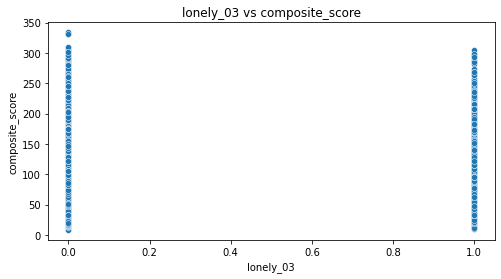

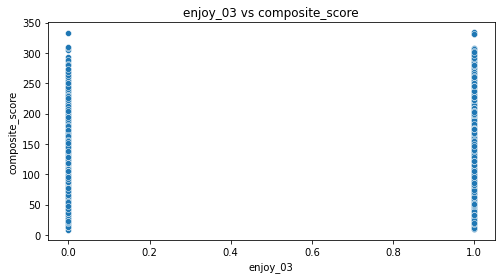

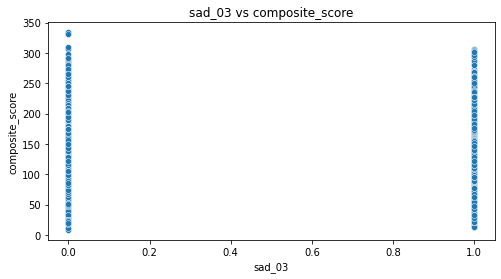

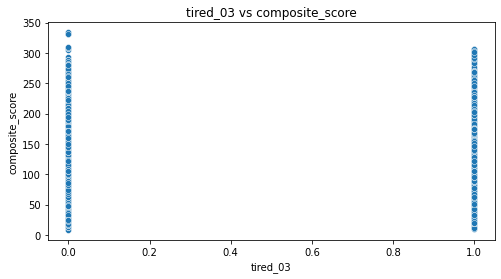

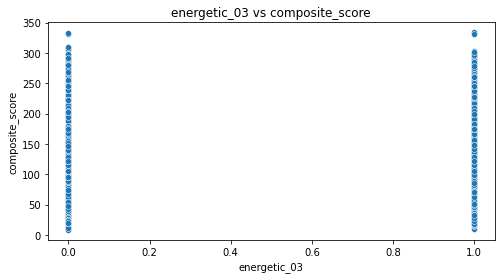

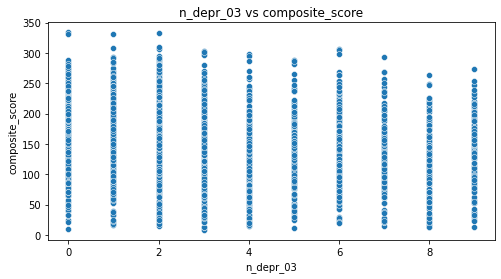

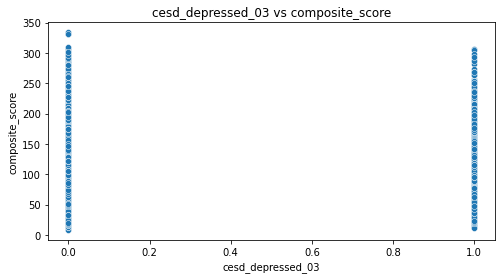

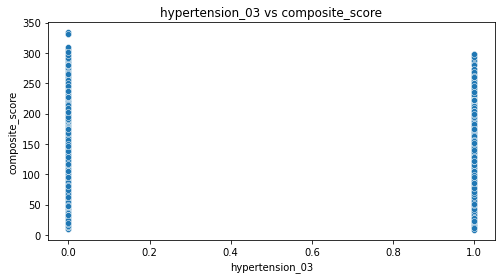

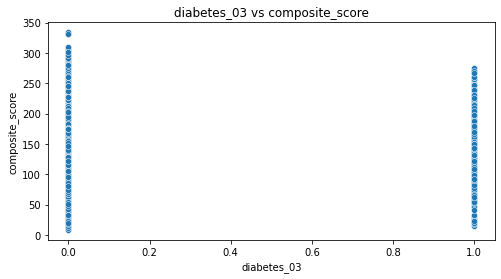

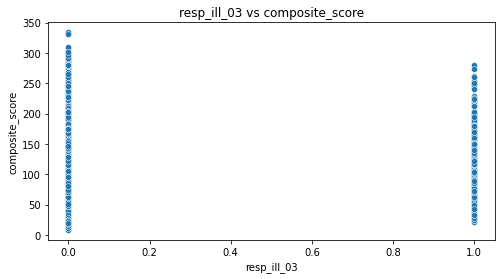

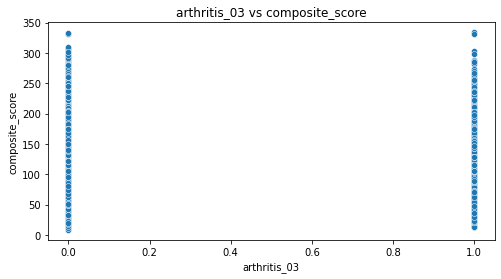

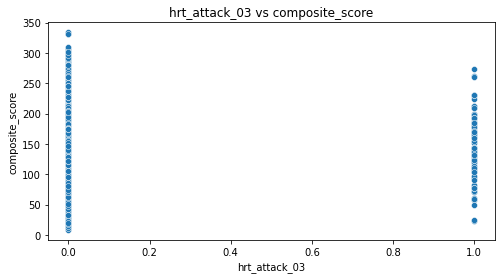

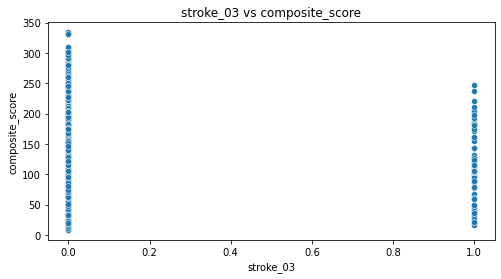

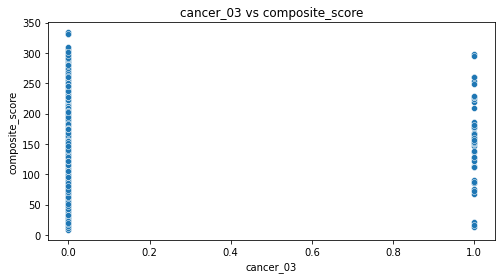

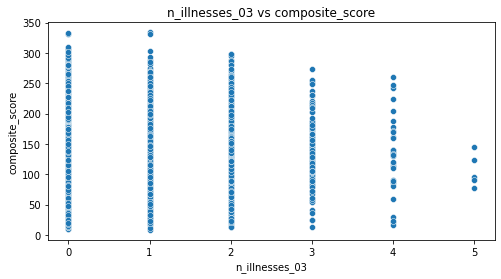

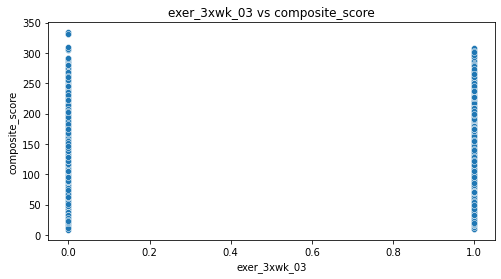

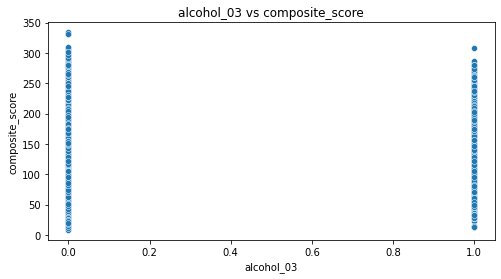

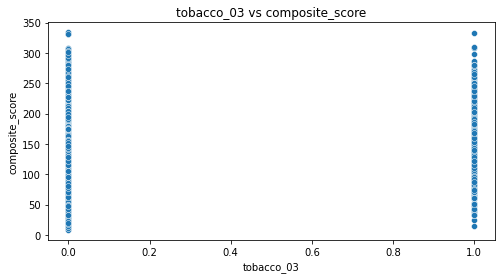

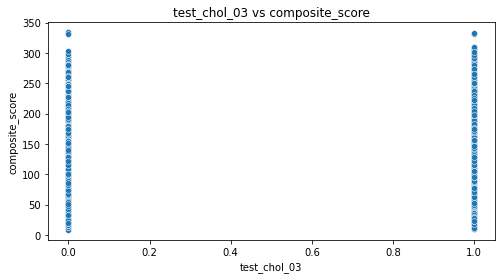

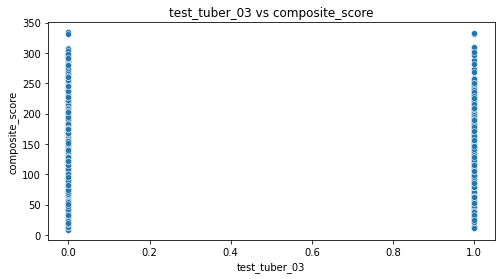

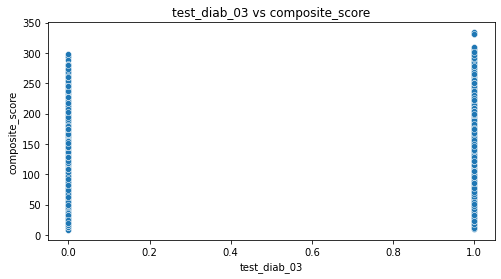

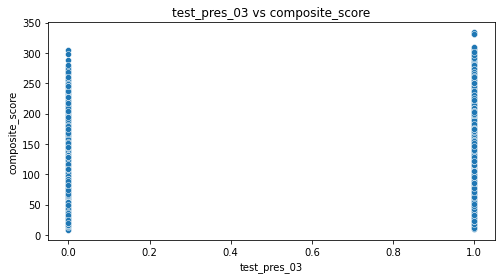

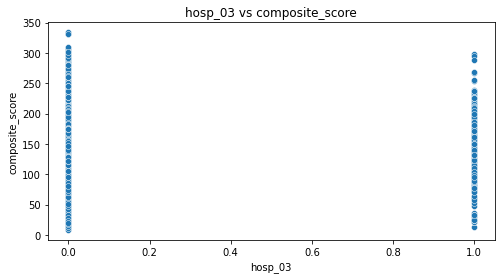

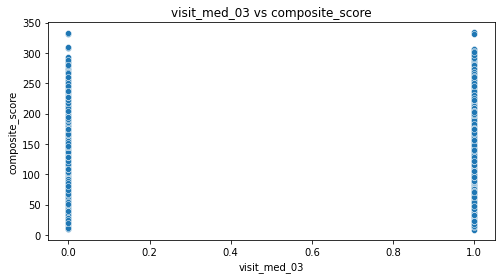

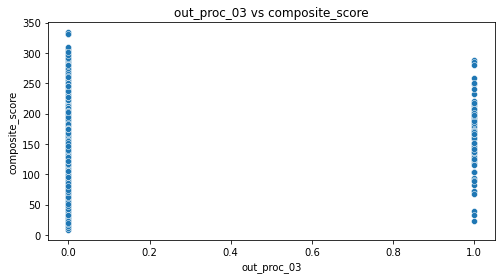

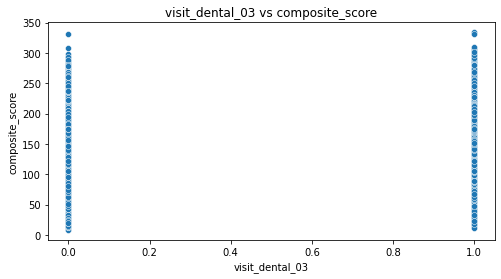

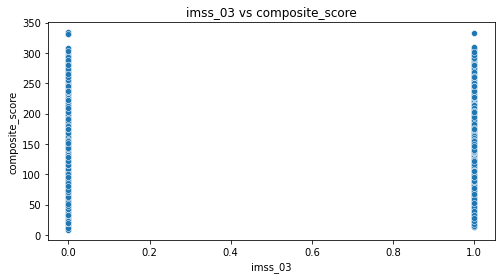

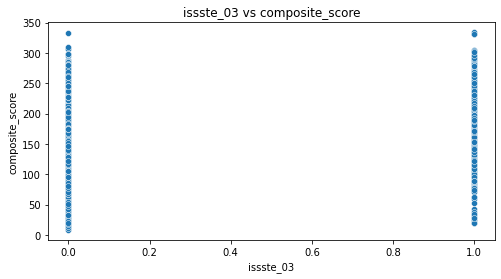

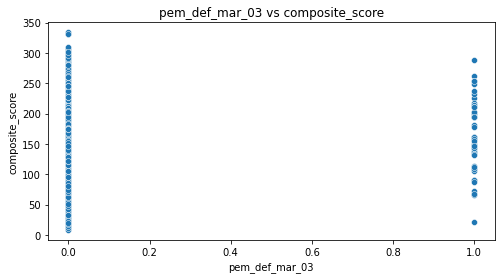

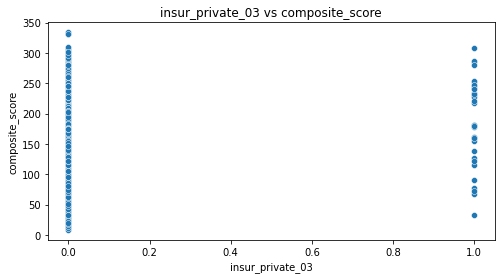

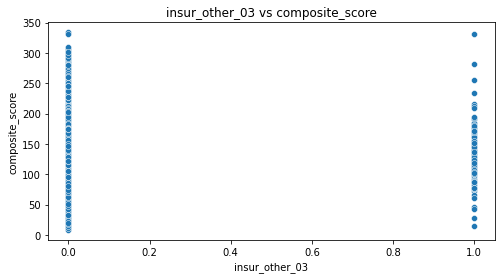

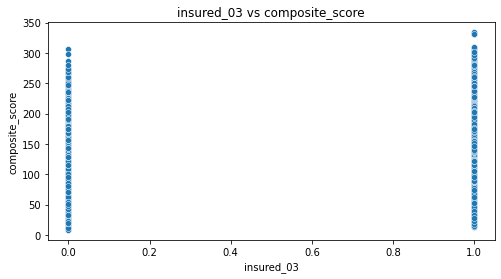

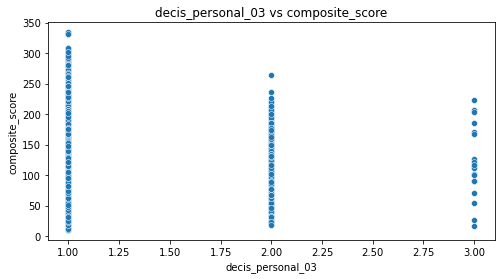

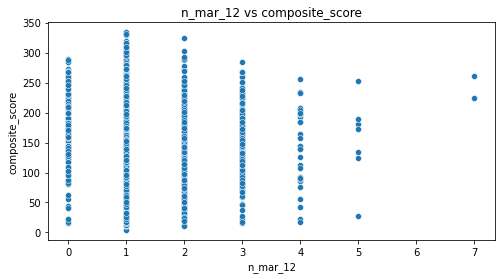

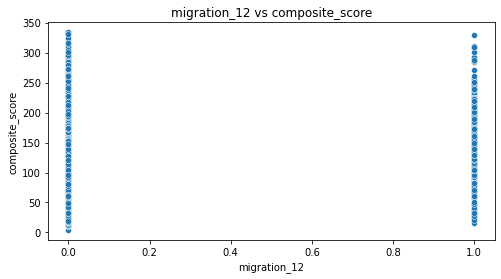

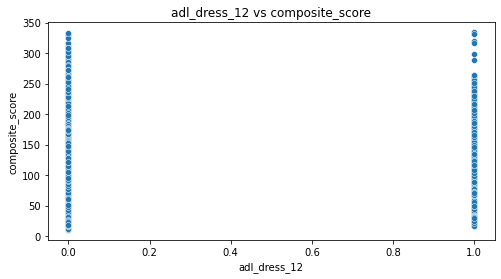

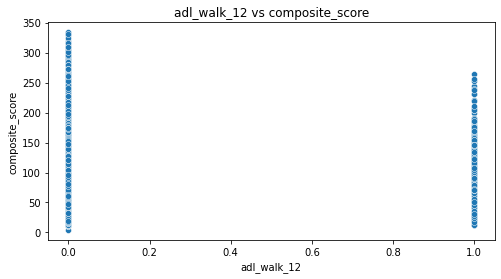

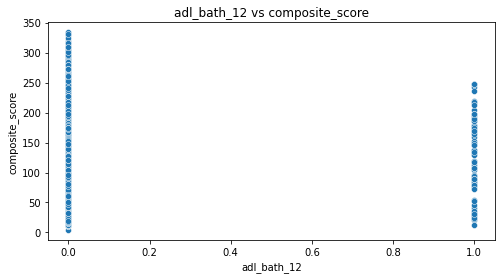

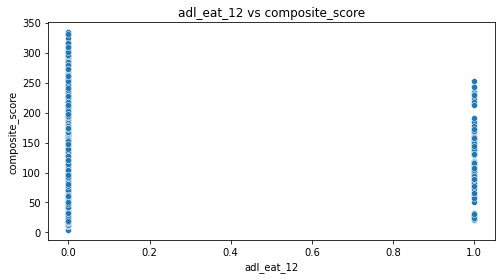

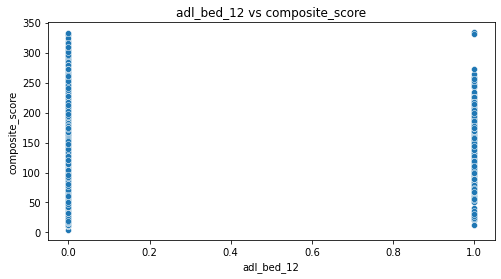

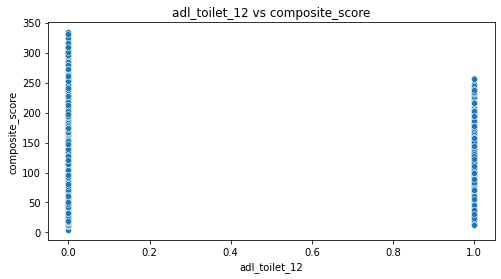

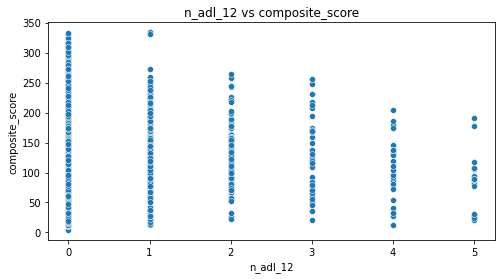

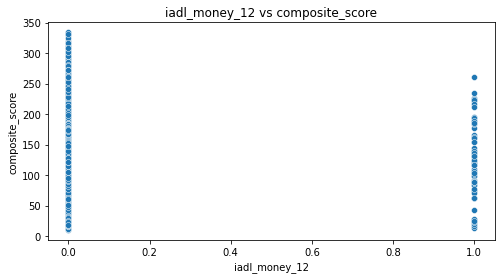

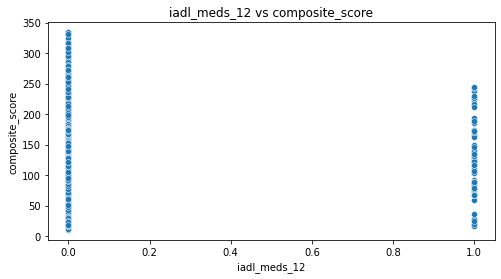

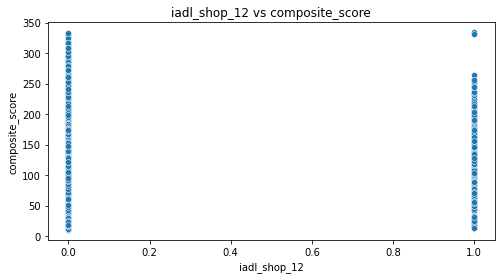

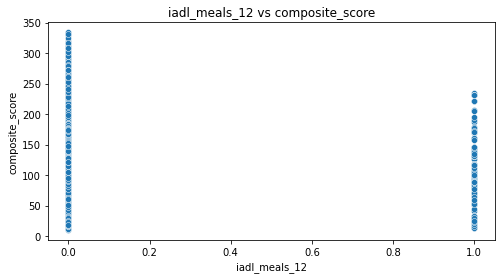

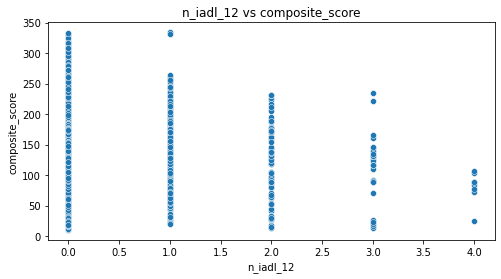

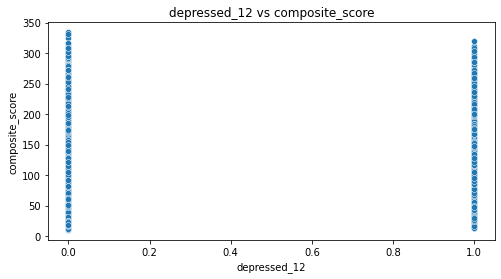

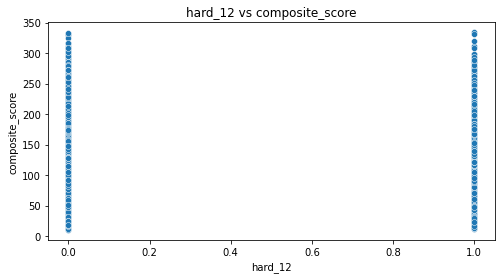

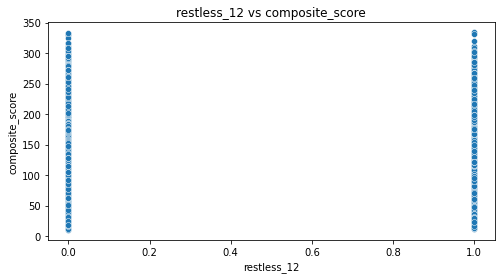

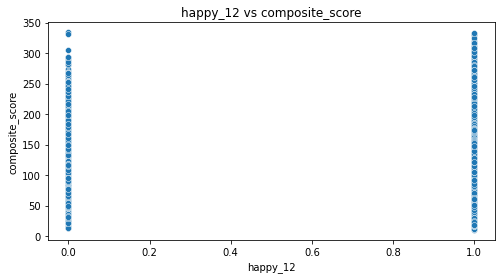

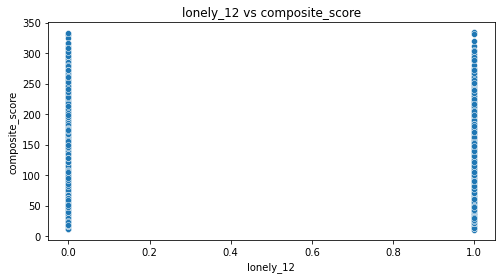

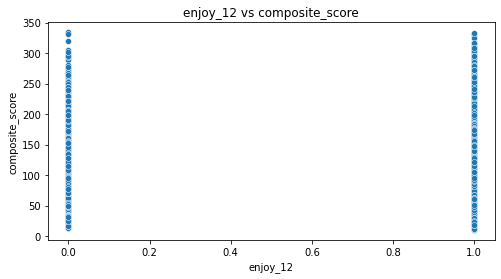

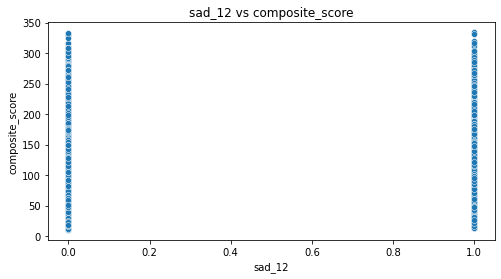

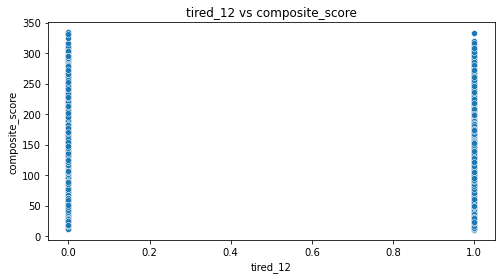

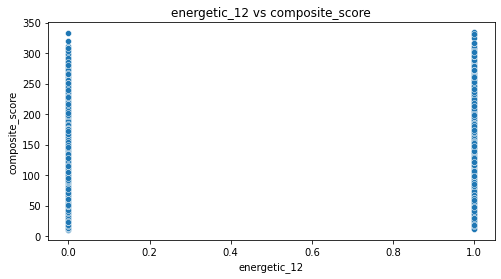

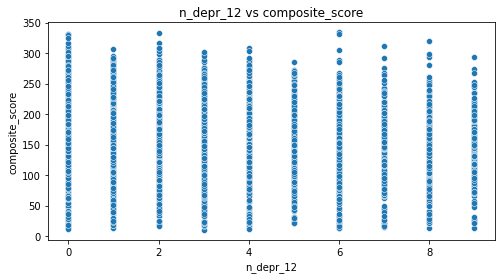

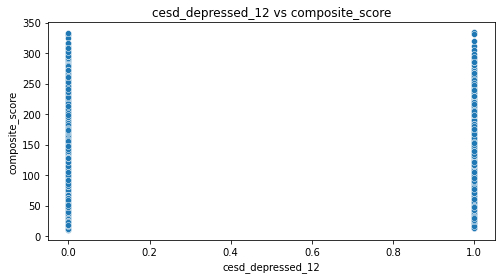

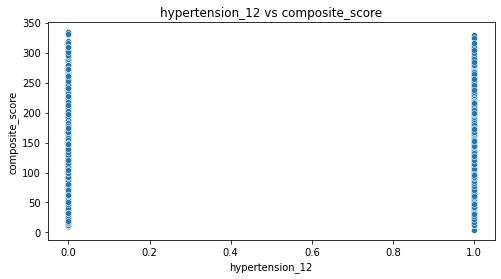

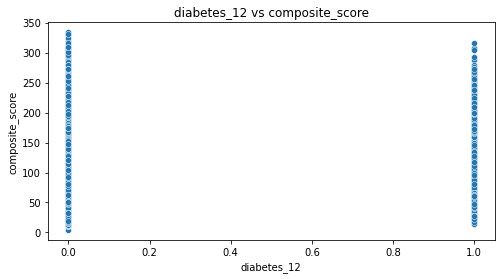

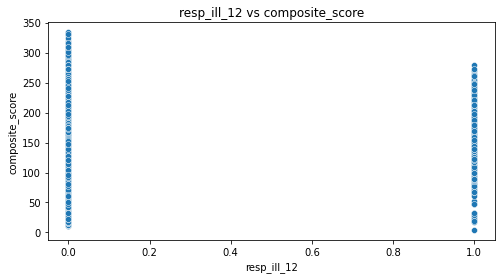

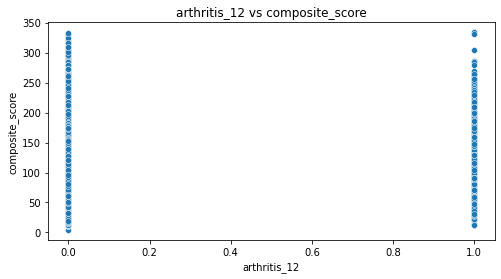

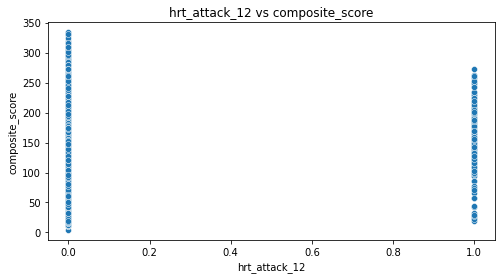

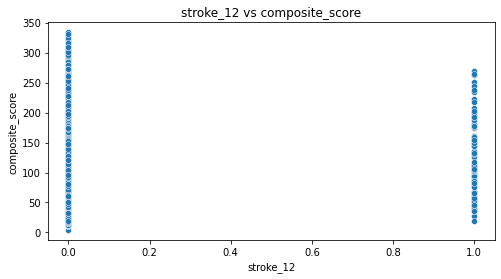

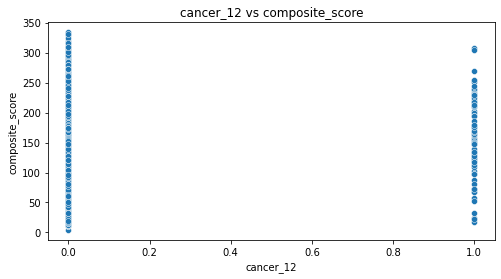

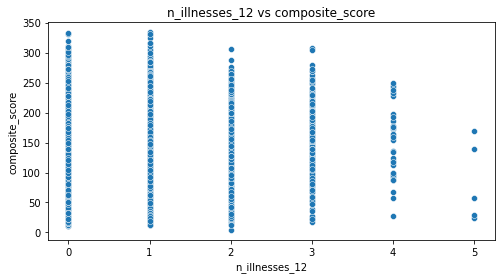

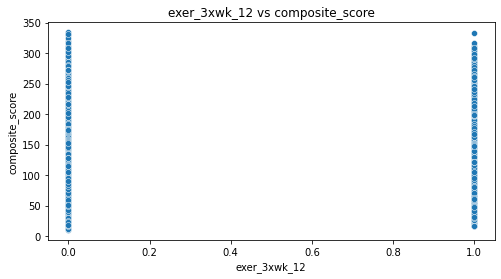

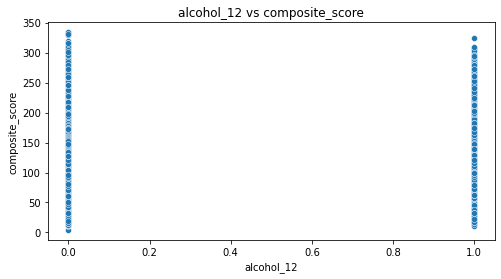

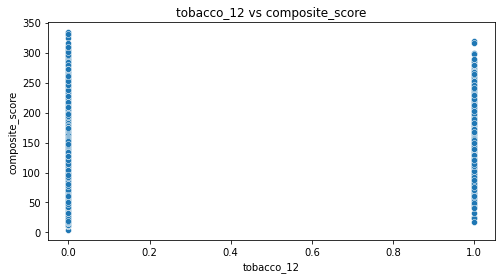

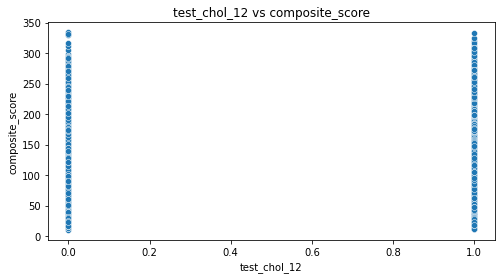

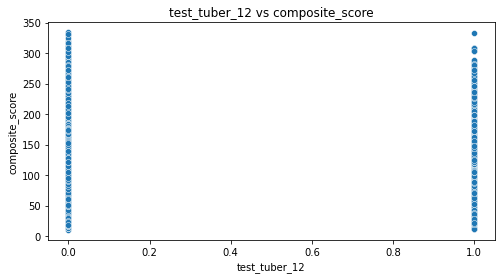

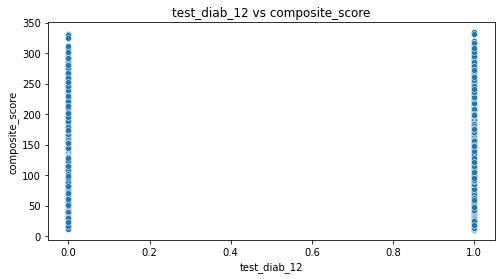

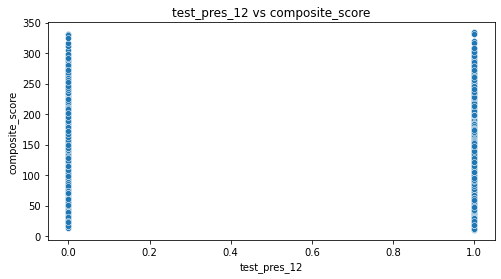

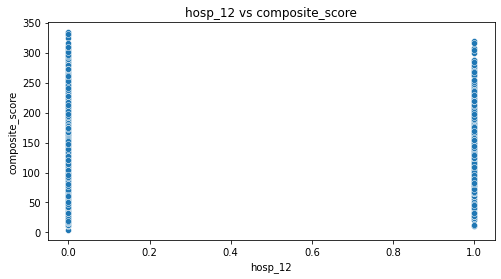

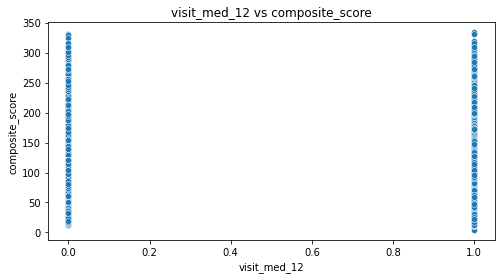

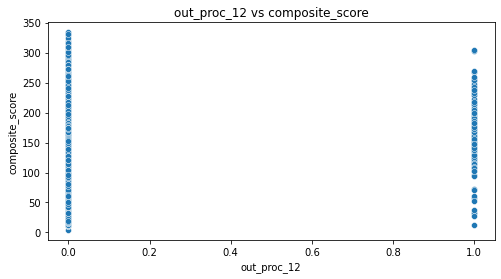

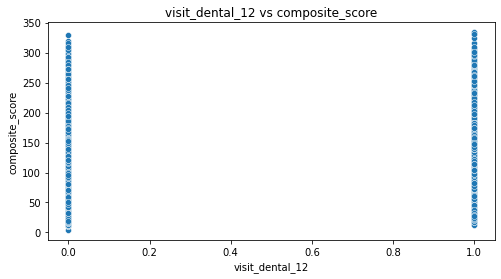

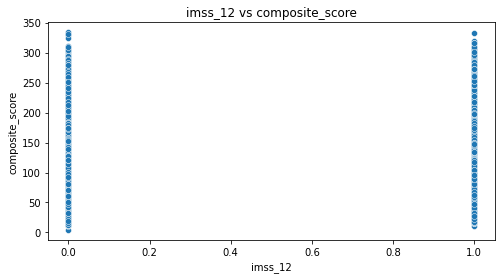

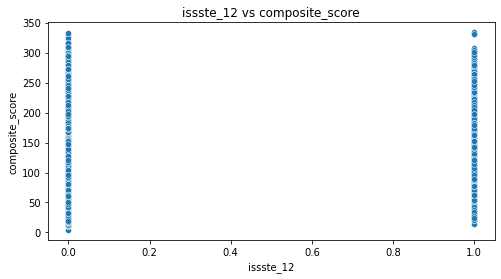

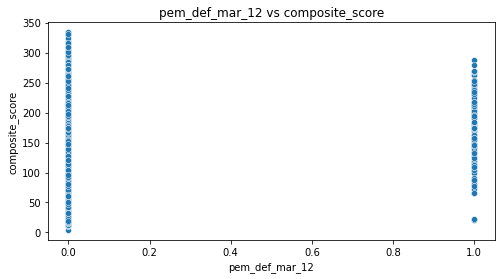

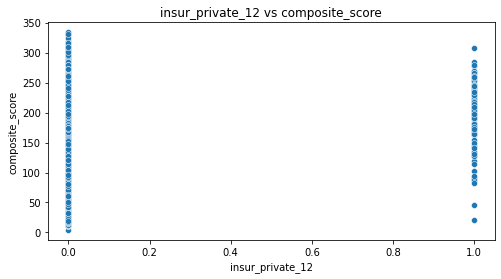

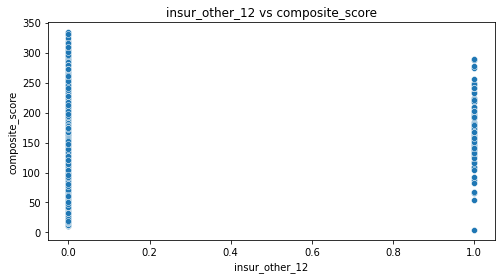

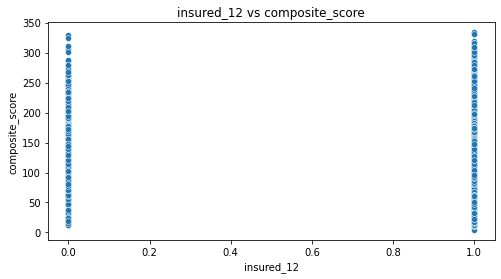

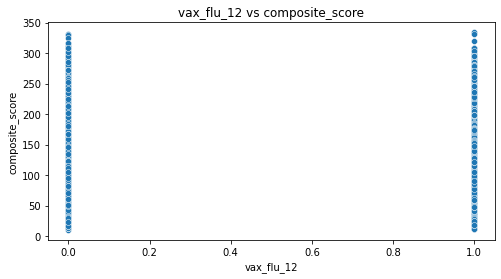

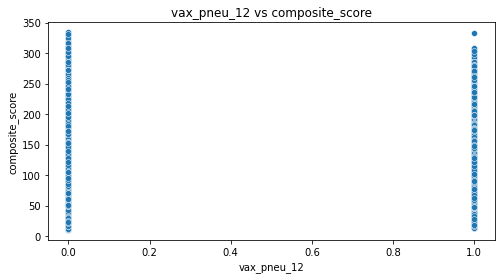

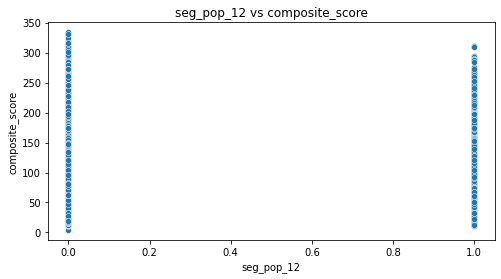

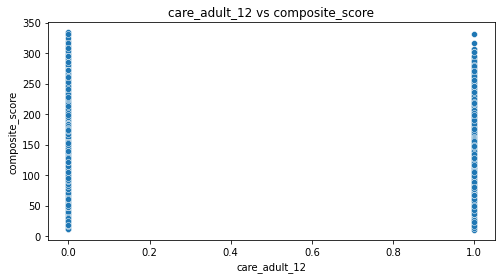

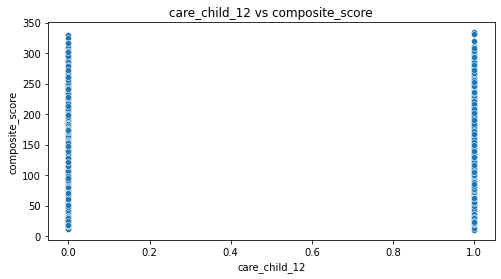

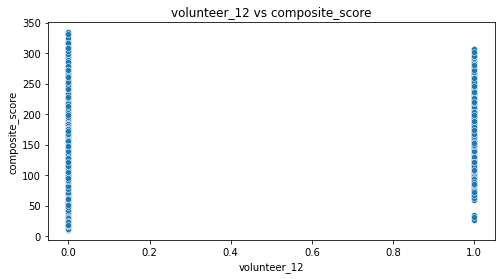

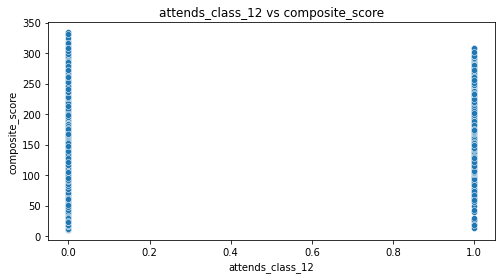

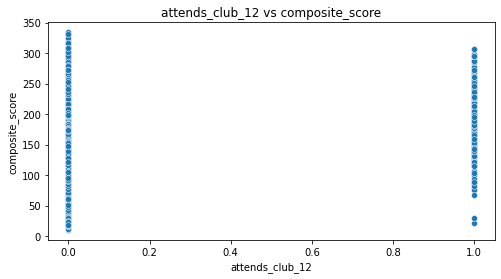

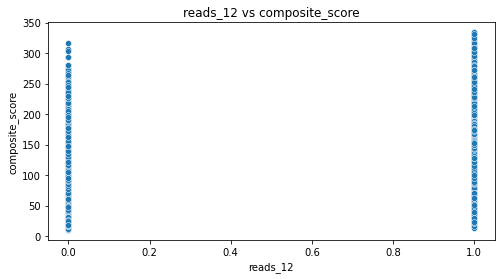

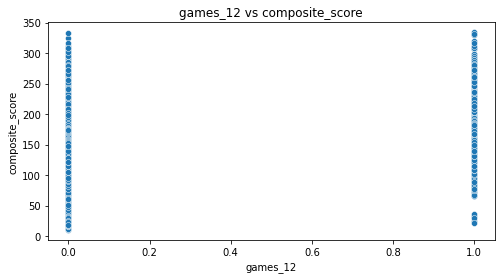

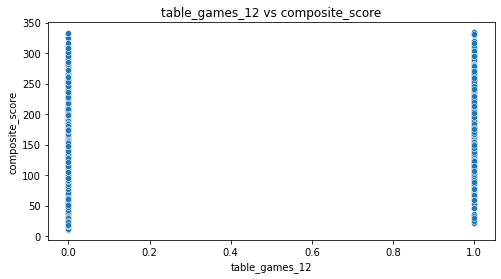

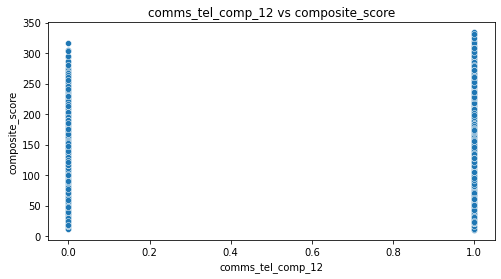

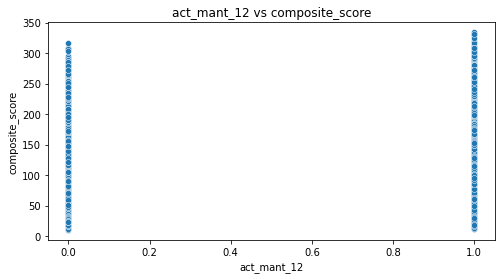

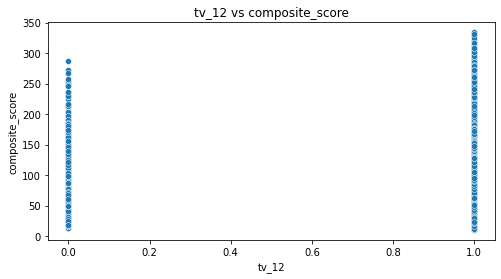

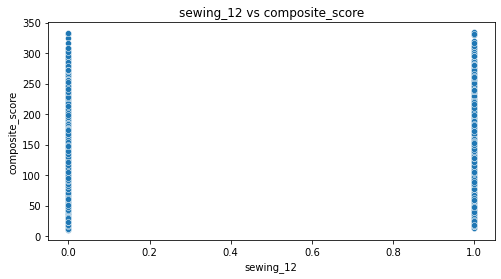

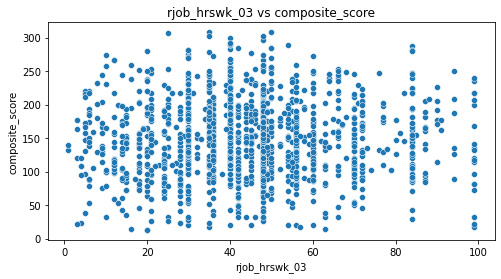

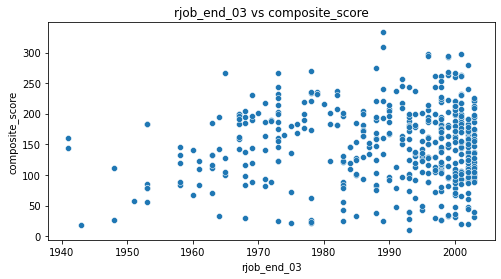

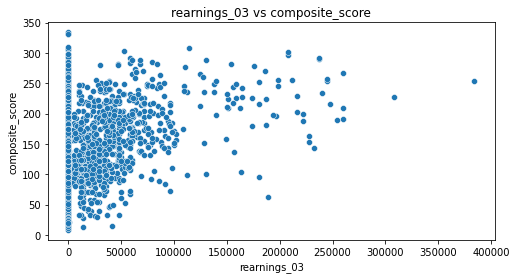

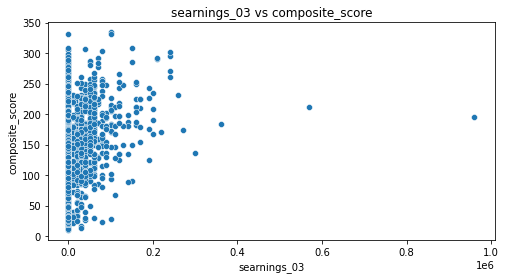

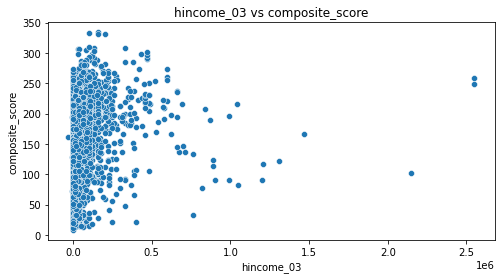

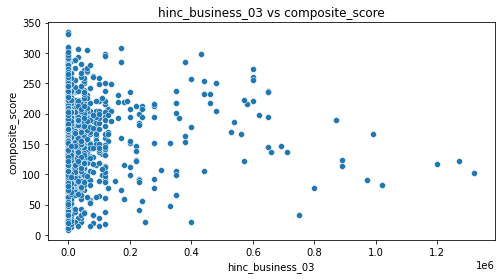

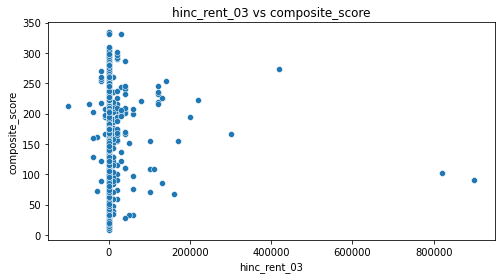

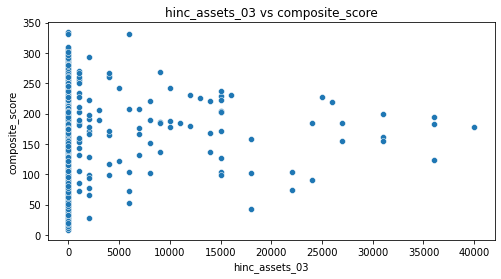

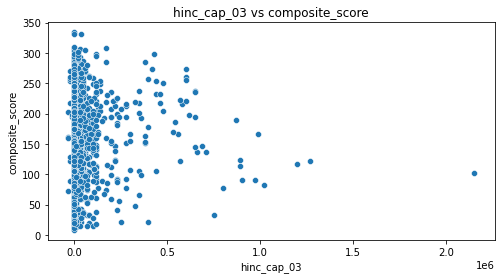

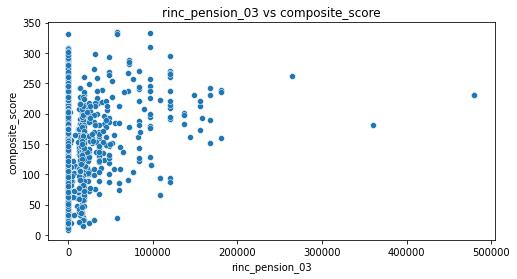

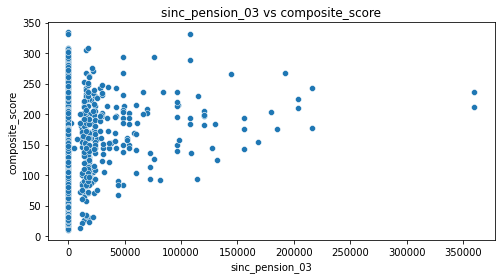

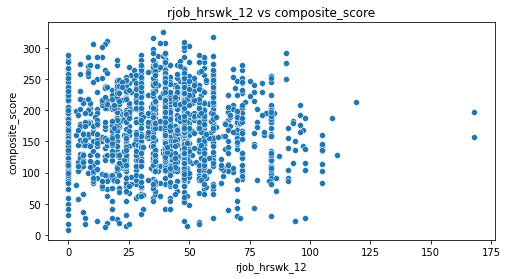

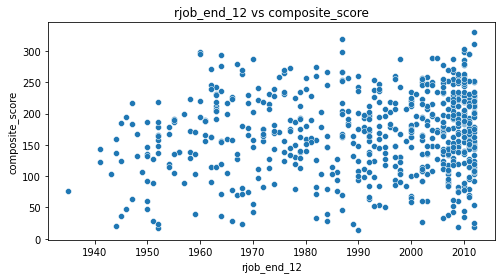

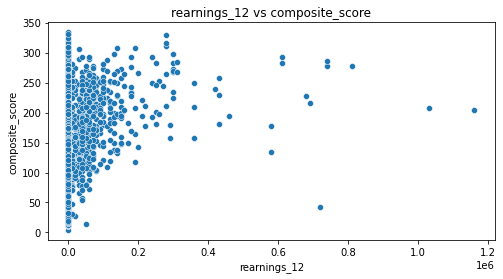

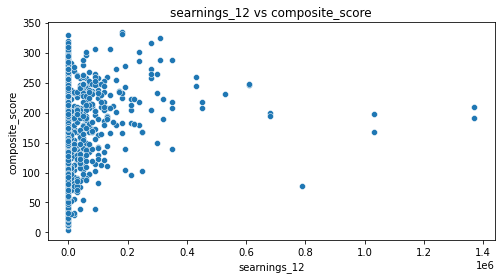

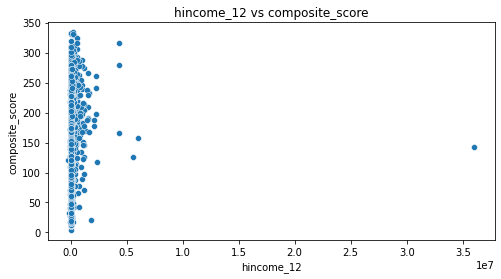

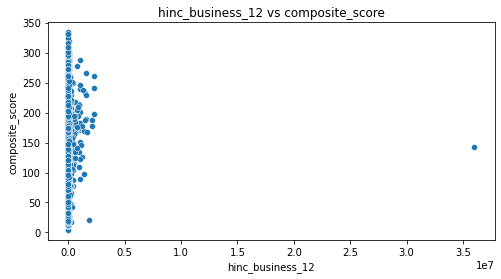

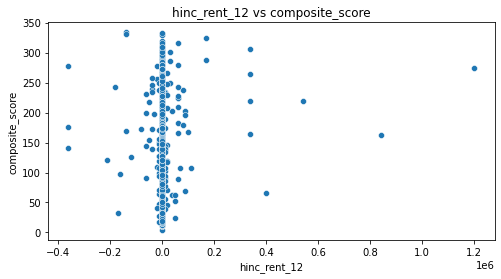

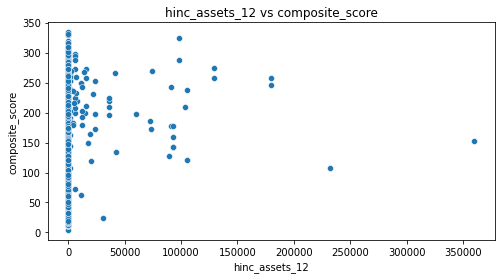

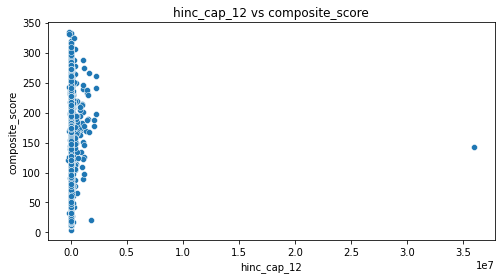

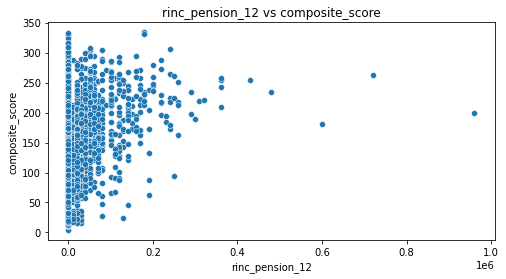

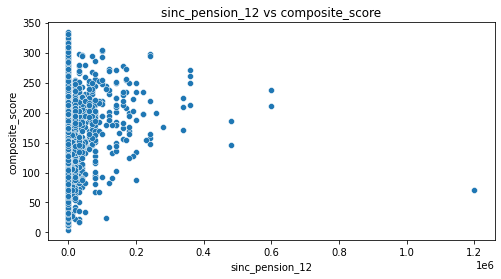

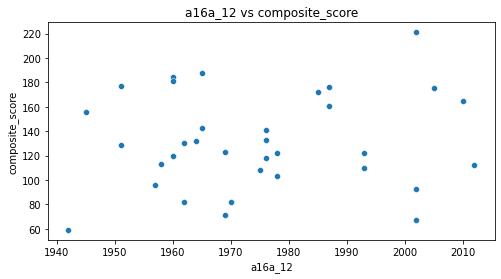

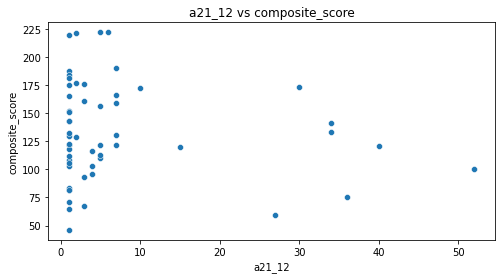

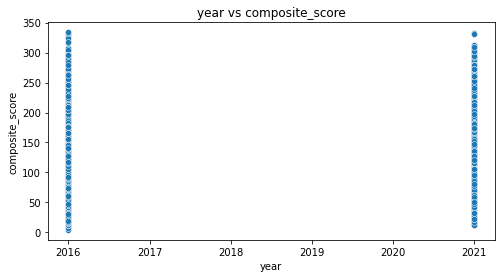

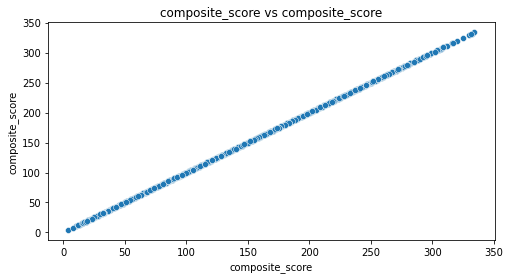

In [12]:
target_variable = 'composite_score'
for col in df.select_dtypes(include=['int', 'float']).columns:
    plt.figure(figsize=(8, 4))
    sns.scatterplot(x=df[col], y=df[target_variable])
    plt.title(f'{col} vs {target_variable}')
    plt.xlabel(col)
    plt.ylabel(target_variable)
    plt.show()


In [11]:
from scipy.stats import ttest_ind

# Select only numerical columns (for t-tests)
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Initialize a dictionary to store results
t_test_results = {}

# Loop through each numerical column, considering each as a missingness target
for target_col in numerical_columns:
    if df[target_col].isnull().sum() > 0:  
        
        # Create groups based on missingness in the target column
        missing_group = df[df[target_col].isnull()]
        non_missing_group = df[df[target_col].notnull()]
        
        # Initialize a sub-dictionary for this target column
        t_test_results[target_col] = {}
        
        # Loop through other numerical columns for comparison
        for compare_col in numerical_columns:
            if target_col != compare_col:  
                
                # Extract values for the comparison column in each group
                missing_values = missing_group[compare_col].dropna()
                non_missing_values = non_missing_group[compare_col].dropna()
                
                # Run t-test if both groups have values
                if len(missing_values) > 0 and len(non_missing_values) > 0:
                    t_stat, p_value = ttest_ind(missing_values, non_missing_values, nan_policy='omit')
                    
                    # Store the t-statistic and p-value
                    t_test_results[target_col][compare_col] = {'t_stat': t_stat, 'p_value': p_value}

# Display t-test results
for target_col, results in t_test_results.items():
    print(f"\nT-Test results for missingness in '{target_col}':")
    for compare_col, stats in results.items():
        print(f"  Compared with '{compare_col}' -> T-statistic: {stats['t_stat']}, p-value: {stats['p_value']}")



T-Test results for missingness in 'n_mar_03':
  Compared with 'migration_03' -> T-statistic: -1.1274156203524275, p-value: 0.2596605539203453
  Compared with 'adl_dress_03' -> T-statistic: -0.15458044611756505, p-value: 0.8771635550665534
  Compared with 'adl_walk_03' -> T-statistic: -0.7137673864410756, p-value: 0.4754289072812595
  Compared with 'adl_bath_03' -> T-statistic: -0.4872973895626648, p-value: 0.6260847104952918
  Compared with 'adl_eat_03' -> T-statistic: -0.34396360274460197, p-value: 0.730898803803224
  Compared with 'adl_bed_03' -> T-statistic: -0.8811341540295653, p-value: 0.37831879067826046
  Compared with 'adl_toilet_03' -> T-statistic: 0.9914921506161879, p-value: 0.32152867378324007
  Compared with 'n_adl_03' -> T-statistic: -0.46482050381852663, p-value: 0.6420951910038111
  Compared with 'iadl_money_03' -> T-statistic: 5.165518952116989, p-value: 2.5711275800685975e-07
  Compared with 'iadl_meds_03' -> T-statistic: 5.407596794051755, p-value: 6.942547009094761

**DATA PREPROCESSING**

In [17]:
df.head()

uid  n_mar_03 n_living_child_03  migration_03 glob_hlth_03  adl_dress_03  \
0  aace       NaN               NaN           NaN          NaN           NaN   
1  aanz       NaN               NaN           NaN          NaN           NaN   
2  aape       NaN               NaN           NaN          NaN           NaN   
3  aape       NaN               NaN           NaN          NaN           NaN   
4  aard       1.0         1. 1 or 2           0.0      4. Fair           0.0   

   adl_walk_03  adl_bath_03  adl_eat_03  adl_bed_03  ...  \
0          NaN          NaN         NaN         NaN  ...   
1          NaN          NaN         NaN         NaN  ...   
2          NaN          NaN         NaN         NaN  ...   
3          NaN          NaN         NaN         NaN  ...   
4          0.0          0.0         0.0         0.0  ...   

                              j11_12  year  composite_score  age_map_03  \
0                         Concrete 2  2021              175         NaN   
1                         Concrete 2  2021              206         NaN   
2  Wood, mosaic, or other covering 1  2016              161         NaN   
3  Wood, mosaic, or other covering 1  2021              144         NaN   
4                         Concrete 2  2021              104         NaN   

   age_map_12  marital_status_03  urban_map_03  urban_map_12  education_03  \
0         NaN                NaN           NaN           NaN           NaN   
1         NaN                NaN           NaN           NaN           NaN   
2         NaN                NaN           NaN           NaN           NaN   
3         NaN                NaN           NaN           NaN           NaN   
4         NaN                NaN           NaN           NaN           NaN   

   education_12  
0           NaN  
1           NaN  
2           NaN  
3           NaN  
4           NaN  

[5 rows x 185 columns]

In [21]:
df['j11_12'].value_counts()

j11_12
Wood, mosaic, or other covering 1    2286
Concrete 2                           1841
Mud 3                                 127
Name: count, dtype: int64

In [13]:
#mapping the age column
age_mapping = {
    0: '49 or younger',
    1: '50–59',
    2: '60–69',
    3: '70–79',
    4: '80+'
}

# Apply the mapping to the 'age_03' column
df['age_map_03'] = df['age_03'].map(age_mapping)
df['age_map_12'] = df['age_12'].map(age_mapping)

#mapping the married column
married_mapping = {
    1: 'Married or in civil union',
    3: 'Widowed',
    2: 'Separated or divorced',
    4: 'Single'
}

# Apply the mapping to the 'married_03' column
df['marital_status_03'] = df['married_03'].map(married_mapping)
df['marital_status_03'] = df['married_12'].map(married_mapping)

urban_mapping = {
    1: '100,000+',
    0: '<100,000'
}

# Apply the mapping to the 'urban_12' column
df['urban_map_03'] = df['urban_03'].map(urban_mapping)
df['urban_map_12'] = df['urban_12'].map(urban_mapping)

education_mapping = {
    0: '<100,000',
    1: '100,000+'
}

#applying the mapping
df['education_03'] = df['edu_gru_03'].map(education_mapping)
df['education_12'] = df['edu_gru_12'].map(education_mapping)

In [14]:
df.head()

uid    age_03     urban_03  married_03  n_mar_03    edu_gru_03  \
0  aace       NaN          NaN         NaN       NaN           NaN   
1  aanz       NaN          NaN         NaN       NaN           NaN   
2  aape       NaN          NaN         NaN       NaN           NaN   
3  aape       NaN          NaN         NaN       NaN           NaN   
4  aard  1. 50–59  1. 100,000+  3. Widowed       1.0  3. 7–9 years   

  n_living_child_03  migration_03 glob_hlth_03  adl_dress_03  ...  \
0               NaN           NaN          NaN           NaN  ...   
1               NaN           NaN          NaN           NaN  ...   
2               NaN           NaN          NaN           NaN  ...   
3               NaN           NaN          NaN           NaN  ...   
4         1. 1 or 2           0.0      4. Fair           0.0  ...   

                              j11_12  year  composite_score  age_map_03  \
0                         Concrete 2  2021              175         NaN   
1                         Concrete 2  2021              206         NaN   
2  Wood, mosaic, or other covering 1  2016              161         NaN   
3  Wood, mosaic, or other covering 1  2021              144         NaN   
4                         Concrete 2  2021              104         NaN   

   age_map_12  marital_status_03  urban_map_03  urban_map_12  education_03  \
0         NaN                NaN           NaN           NaN           NaN   
1         NaN                NaN           NaN           NaN           NaN   
2         NaN                NaN           NaN           NaN           NaN   
3         NaN                NaN           NaN           NaN           NaN   
4         NaN                NaN           NaN           NaN           NaN   

   education_12  
0           NaN  
1           NaN  
2           NaN  
3           NaN  
4           NaN  

[5 rows x 193 columns]

In [15]:
# Drop the original columns after mapping
df = df.drop(['married_03', 'married_12', 'urban_03', 'urban_12', 'edu_gru_03', 'edu_gru_12'], axis=1)

# Check the result
df.head()

uid    age_03  n_mar_03 n_living_child_03  migration_03 glob_hlth_03  \
0  aace       NaN       NaN               NaN           NaN          NaN   
1  aanz       NaN       NaN               NaN           NaN          NaN   
2  aape       NaN       NaN               NaN           NaN          NaN   
3  aape       NaN       NaN               NaN           NaN          NaN   
4  aard  1. 50–59       1.0         1. 1 or 2           0.0      4. Fair   

   adl_dress_03  adl_walk_03  adl_bath_03  adl_eat_03  ...  \
0           NaN          NaN          NaN         NaN  ...   
1           NaN          NaN          NaN         NaN  ...   
2           NaN          NaN          NaN         NaN  ...   
3           NaN          NaN          NaN         NaN  ...   
4           0.0          0.0          0.0         0.0  ...   

                              j11_12  year  composite_score  age_map_03  \
0                         Concrete 2  2021              175         NaN   
1                         Concrete 2  2021              206         NaN   
2  Wood, mosaic, or other covering 1  2016              161         NaN   
3  Wood, mosaic, or other covering 1  2021              144         NaN   
4                         Concrete 2  2021              104         NaN   

   age_map_12  marital_status_03  urban_map_03  urban_map_12  education_03  \
0         NaN                NaN           NaN           NaN           NaN   
1         NaN                NaN           NaN           NaN           NaN   
2         NaN                NaN           NaN           NaN           NaN   
3         NaN                NaN           NaN           NaN           NaN   
4         NaN                NaN           NaN           NaN           NaN   

   education_12  
0           NaN  
1           NaN  
2           NaN  
3           NaN  
4           NaN  

[5 rows x 187 columns]

In [16]:
df = df.drop(['age_03', 'age_12'], axis=1)
df.head()

uid  n_mar_03 n_living_child_03  migration_03 glob_hlth_03  adl_dress_03  \
0  aace       NaN               NaN           NaN          NaN           NaN   
1  aanz       NaN               NaN           NaN          NaN           NaN   
2  aape       NaN               NaN           NaN          NaN           NaN   
3  aape       NaN               NaN           NaN          NaN           NaN   
4  aard       1.0         1. 1 or 2           0.0      4. Fair           0.0   

   adl_walk_03  adl_bath_03  adl_eat_03  adl_bed_03  ...  \
0          NaN          NaN         NaN         NaN  ...   
1          NaN          NaN         NaN         NaN  ...   
2          NaN          NaN         NaN         NaN  ...   
3          NaN          NaN         NaN         NaN  ...   
4          0.0          0.0         0.0         0.0  ...   

                              j11_12  year  composite_score  age_map_03  \
0                         Concrete 2  2021              175         NaN   
1                         Concrete 2  2021              206         NaN   
2  Wood, mosaic, or other covering 1  2016              161         NaN   
3  Wood, mosaic, or other covering 1  2021              144         NaN   
4                         Concrete 2  2021              104         NaN   

   age_map_12  marital_status_03  urban_map_03  urban_map_12  education_03  \
0         NaN                NaN           NaN           NaN           NaN   
1         NaN                NaN           NaN           NaN           NaN   
2         NaN                NaN           NaN           NaN           NaN   
3         NaN                NaN           NaN           NaN           NaN   
4         NaN                NaN           NaN           NaN           NaN   

   education_12  
0           NaN  
1           NaN  
2           NaN  
3           NaN  
4           NaN  

[5 rows x 185 columns]

In [22]:
# Define mappings for each column
mappings = {
    'n_living_child_03': {
        0: 'No children',
        1: '1 or 2',
        2: '3 or 4',
        3: '5 or 6',
        4: '7+'
    },
    'migration_03': {
        0: 'Not migrated',
        1: 'Migrated'
    },
    'glob_hlth_03': {
        1: 'Excellent',
        2: 'Very good',
        3: 'Good',
        4: 'Fair',
        5: 'Poor'
    },
    'j11_12': {
        'Wood, mosaic, or other covering 1': 'Wood or mosaic',
        'Concrete 2': 'Concrete',
        'Mud 3': 'Mud'
    },
    'n_living_child_12': {
        0: 'No children',
        1: '1 or 2',
        2: '3 or 4',
        3: '5 or 6',
        4: '7+'
    },
    'migration_12': {
        0: 'Not migrated',
        1: 'Migrated'
    },
    'glob_hlth_12': {
        1: 'Excellent',
        2: 'Very good',
        3: 'Good',
        4: 'Fair',
        5: 'Poor'
    }
}
# Apply mapping for each column using a loop
for column, mapping in mappings.items():
    df[column + '_mapped'] = df[column].map(mapping)

# Optionally drop the original columns
df = df.drop(['n_living_child_03', 'n_living_child_12', 'migration_12', 'migration_03', 'glob_hlth_03', 'glob_hlth_03', 'j11_12'], axis=1)
df.head()


uid  n_mar_03  adl_dress_03  adl_walk_03  adl_bath_03  adl_eat_03  \
0  aace       NaN           NaN          NaN          NaN         NaN   
1  aanz       NaN           NaN          NaN          NaN         NaN   
2  aape       NaN           NaN          NaN          NaN         NaN   
3  aape       NaN           NaN          NaN          NaN         NaN   
4  aard       1.0           0.0          0.0          0.0         0.0   

   adl_bed_03  adl_toilet_03  n_adl_03  iadl_money_03  ...  urban_map_12  \
0         NaN            NaN       NaN            NaN  ...           NaN   
1         NaN            NaN       NaN            NaN  ...           NaN   
2         NaN            NaN       NaN            NaN  ...           NaN   
3         NaN            NaN       NaN            NaN  ...           NaN   
4         0.0            0.0       0.0            0.0  ...           NaN   

   education_03  education_12  n_living_child_03_mapped  migration_03_mapped  \
0           NaN           NaN                       NaN                  NaN   
1           NaN           NaN                       NaN                  NaN   
2           NaN           NaN                       NaN                  NaN   
3           NaN           NaN                       NaN                  NaN   
4           NaN           NaN                       NaN         Not migrated   

   glob_hlth_03_mapped   j11_12_mapped  n_living_child_12_mapped  \
0                  NaN        Concrete                       NaN   
1                  NaN        Concrete                       NaN   
2                  NaN  Wood or mosaic                       NaN   
3                  NaN  Wood or mosaic                       NaN   
4                  NaN        Concrete                       NaN   

   migration_12_mapped  glob_hlth_12_mapped  
0         Not migrated                  NaN  
1         Not migrated                  NaN  
2         Not migrated                  NaN  
3         Not migrated                  NaN  
4         Not migrated                  NaN  

[5 rows x 186 columns]

In [34]:
# Define mappings for each column
mappings = {
    'bmi_03': {
        1: 'Underweight',
        2: 'Normal weight',
        3: 'Overweight',
        4: 'Obese',
        5: 'Morbidly obese'
    },
    'bmi_12': {
        1: 'Underweight',
        2: 'Normal weight',
        3: 'Overweight',
        4: 'Obese',
        5: 'Morbidly obese'
    },
    'decis_famil_03': {
        1: 'Respondent',
        2: 'Approximately equal weight',
        3: 'Spouse'
    },
    'employment_03': {
        1: 'Currently Working',
        2: 'Currently looking for work',
        3: 'Dedicated to household chores',
        4: 'Retired, incapacitated, or does not work'
    },
    'employment_12': {
        1: 'Currently Working',
        2: 'Currently looking for work',
        3: 'Dedicated to household chores',
        4: 'Retired, incapacitated, or does not work'
    },
    'glob_hlth_12': {
        1: 'Excellent',
        2: 'Very good',
        3: 'Good',
        4: 'Fair',
        5: 'Poor'
    },
    'decis_personal_12': {
        1: 'A lot',
        2: 'A little',
        3: 'None'
    },
    'satis_ideal_12': {
        1: 'Agrees',
        2: 'Neither agrees nor disagrees',
        3: 'Disagrees'
    }
}

# Apply mapping for each column using a loop
for column, mapping in mappings.items():
    df[column + '_mapped'] = df[column].map(mapping)

# Optionally drop the original columns
df = df.drop(columns=list(mappings.keys()))


In [36]:
df

uid  n_mar_03  adl_dress_03  adl_walk_03  adl_bath_03  adl_eat_03  \
0     aace       NaN           NaN          NaN          NaN         NaN   
1     aanz       NaN           NaN          NaN          NaN         NaN   
2     aape       NaN           NaN          NaN          NaN         NaN   
3     aape       NaN           NaN          NaN          NaN         NaN   
4     aard       1.0           0.0          0.0          0.0         0.0   
...    ...       ...           ...          ...          ...         ...   
4338  zzag       1.0           0.0          0.0          0.0         0.0   
4339  zzci       1.0           0.0          0.0          0.0         0.0   
4340  zzci       1.0           0.0          0.0          0.0         0.0   
4341  zzjb       1.0           0.0          0.0          0.0         0.0   
4342  zzti       3.0           0.0          0.0          0.0         0.0   

      adl_bed_03  adl_toilet_03  n_adl_03  iadl_money_03  ...  \
0            NaN            NaN       NaN            NaN  ...   
1            NaN            NaN       NaN            NaN  ...   
2            NaN            NaN       NaN            NaN  ...   
3            NaN            NaN       NaN            NaN  ...   
4            0.0            0.0       0.0            0.0  ...   
...          ...            ...       ...            ...  ...   
4338         0.0            0.0       0.0            0.0  ...   
4339         0.0            0.0       0.0            0.0  ...   
4340         0.0            0.0       0.0            0.0  ...   
4341         0.0            0.0       0.0            0.0  ...   
4342         0.0            0.0       0.0            0.0  ...   

      n_living_child_12_mapped  migration_12_mapped  glob_hlth_12_mapped  \
0                          NaN         Not migrated                  NaN   
1                          NaN         Not migrated                  NaN   
2                          NaN         Not migrated                  NaN   
3                          NaN         Not migrated                  NaN   
4                          NaN         Not migrated                  NaN   
...                        ...                  ...                  ...   
4338                       NaN         Not migrated                  NaN   
4339                       NaN         Not migrated                  NaN   
4340                       NaN         Not migrated                  NaN   
4341                       NaN         Not migrated                  NaN   
4342                       NaN         Not migrated                  NaN   

      bmi_03_mapped  bmi_12_mapped  decis_famil_03_mapped  \
0               NaN            NaN                    NaN   
1               NaN            NaN                    NaN   
2               NaN            NaN                    NaN   
3               NaN            NaN                    NaN   
4               NaN            NaN                    NaN   
...             ...            ...                    ...   
4338            NaN            NaN                    NaN   
4339            NaN            NaN                    NaN   
4340            NaN            NaN                    NaN   
4341            NaN            NaN                    NaN   
4342            NaN            NaN                    NaN   

      employment_03_mapped  employment_12_mapped  decis_personal_12_mapped  \
0                      NaN                   NaN                       NaN   
1                      NaN                   NaN                       NaN   
2                      NaN                   NaN                       NaN   
3                      NaN                   NaN                       NaN   
4                      NaN                   NaN                       NaN   
...                    ...                   ...                       ...   
4338                   NaN                   NaN                       NaN   
4339                   NaN                 

In [37]:
categorical_columns = df.select_dtypes(include='object')
categorical_columns

uid                 decis_famil_12                   satis_excel_12  \
0     aace  2. Approximately equal weight                     3. Disagrees   
1     aanz  2. Approximately equal weight  2. Neither agrees nor disagrees   
2     aape                      3. Spouse                        1. Agrees   
3     aape                      3. Spouse                        1. Agrees   
4     aard                            NaN                        1. Agrees   
...    ...                            ...                              ...   
4338  zzag  2. Approximately equal weight  2. Neither agrees nor disagrees   
4339  zzci                            NaN  2. Neither agrees nor disagrees   
4340  zzci                            NaN  2. Neither agrees nor disagrees   
4341  zzjb                            NaN                              NaN   
4342  zzti                  1. Respondent  2. Neither agrees nor disagrees   

     satis_fine_12                     cosas_imp_12  \
0        1. Agrees                        1. Agrees   
1        1. Agrees  2. Neither agrees nor disagrees   
2        1. Agrees                        1. Agrees   
3        1. Agrees                        1. Agrees   
4     3. Disagrees                     3. Disagrees   
...            ...                              ...   
4338     1. Agrees  2. Neither agrees nor disagrees   
4339     1. Agrees  2. Neither agrees nor disagrees   
4340     1. Agrees  2. Neither agrees nor disagrees   
4341           NaN                              NaN   
4342     1. Agrees  2. Neither agrees nor disagrees   

                    wouldnt_change_12     memory_12 ragender       rameduc_m  \
0                        3. Disagrees  2. Very good    1.Man          1.None   
1                           1. Agrees       4. Fair    1.Man          1.None   
2                           1. Agrees       4. Fair  2.Woman  2.Some primary   
3                           1. Agrees       4. Fair  2.Woman  2.Some primary   
4                        3. Disagrees       3. Good  2.Woman  2.Some primary   
...                               ...           ...      ...             ...   
4338                        1. Agrees       3. Good  2.Woman          1.None   
4339                        1. Agrees       3. Good  2.Woman             NaN   
4340                        1. Agrees       3. Good  2.Woman             NaN   
4341                              NaN           NaN    1.Man          1.None   
4342  2. Neither agrees nor disagrees       3. Good    1.Man          1.None   

           rafeduc_m  ... n_living_child_12_mapped migration_12_mapped  \
0             1.None  ...                      NaN        Not migrated   
1             1.None  ...                      NaN        Not migrated   
2     2.Some primary  ...                      NaN        Not migrated   
3     2.Some primary  ...                      NaN        Not migrated   
4     2.Some primary  ...                      NaN        Not migrated   
...              ...  ...                      ...                 ...   
4338          1.None  ...                      NaN        Not migrated   
4339  2.Some primary  ...                      NaN        Not migrated   
4340  2.Some primary  ...                      NaN        Not migrated   
4341          1.None  ...                      NaN        Not migrated   
4342          1.None  ...                      NaN        Not migrated   

     glob_hlth_12_mapped bmi_03_mapped bmi_12_mapped decis_famil_03_mapped  \
0                    NaN           NaN           NaN                   NaN   
1                    NaN           NaN           NaN                   NaN   
2                    NaN           NaN           NaN                   NaN   
3                    NaN           NaN           NaN                   NaN   
4                    NaN           NaN           NaN                   NaN   
...                  ...           ...           ...                   ...   
4338         

In [24]:
#scaling
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Preprocessing for categorical columns
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ])


In [ ]:
#Remove instances with rare classes
rare_classes = y.value_counts()[y.value_counts() < 2].index
df = df[~df['composite_score'].isin(rare_classes)]

# Re-define X and y after removing rare classes
X = df.drop(columns=['composite_score', 'uid'])
y = df['composite_score']


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [34]:
# Define the model
model = RandomForestClassifier(random_state=42)

# Create a full pipeline with preprocessing and model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', model)])

# Perform cross-validation
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='roc_auc')
print(f"Cross-validated AUC-ROC: {np.mean(cv_scores):.3f}")


ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\hp\anaconda\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\hp\anaconda\envs\learn-env\lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\hp\anaconda\envs\learn-env\lib\site-packages\sklearn\pipeline.py", line 423, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "c:\Users\hp\anaconda\envs\learn-env\lib\site-packages\sklearn\pipeline.py", line 377, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "c:\Users\hp\anaconda\envs\learn-env\lib\site-packages\joblib\memory.py", line 312, in __call__
    return self.func(*args, **kwargs)
  File "c:\Users\hp\anaconda\envs\learn-env\lib\site-packages\sklearn\pipeline.py", line 957, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "c:\Users\hp\anaconda\envs\learn-env\lib\site-packages\sklearn\utils\_set_output.py", line 157, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "c:\Users\hp\anaconda\envs\learn-env\lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\hp\anaconda\envs\learn-env\lib\site-packages\sklearn\compose\_column_transformer.py", line 751, in fit_transform
    self._validate_column_callables(X)
  File "c:\Users\hp\anaconda\envs\learn-env\lib\site-packages\sklearn\compose\_column_transformer.py", line 459, in _validate_column_callables
    transformer_to_input_indices[name] = _get_column_indices(X, columns)
  File "c:\Users\hp\anaconda\envs\learn-env\lib\site-packages\sklearn\utils\__init__.py", line 405, in _get_column_indices
    key_dtype = _determine_key_type(key)
  File "c:\Users\hp\anaconda\envs\learn-env\lib\site-packages\sklearn\utils\__init__.py", line 281, in _determine_key_type
    raise ValueError(err_msg)
ValueError: No valid specification of the columns. Only a scalar, list or slice of all integers or all strings, or boolean mask is allowed


**FEATURE IMPORTANCE**

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Assuming df_cleaned is your DataFrame and 'target' is your target variable
X = df.drop('composite_score', axis=1)
y = df['composite_score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Random Forest model
model = RandomForestClassifier(random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Get feature importance
importances = model.feature_importances_
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort features by importance
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Display the feature importance
print(feature_importance)


ValueError: could not convert string to float: 'tggo'